# Sesión 13 - Parte 1 analisis eda automatizado de Series de Tiempo

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/U.S._crude_oil_production.csv')

In [3]:
df

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1


In [4]:
profile = ProfileReport(
    df=df,
    title="Reporte EDA rápido",
    explorative=True
)

## 

# Sesión 14 - Parte 2 de modelos de Series de Tiempo

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error



In [2]:
# Carga de datos
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/U.S._crude_oil_production.csv')

In [3]:
df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [5]:
from statsmodels.tsa.arima.model import ARIMA



In [ ]:
# Selección de una columna
df['Month']

0      2008-06-01
1      2008-07-01
2      2008-08-01
3      2008-09-01
4      2008-10-01
          ...    
116    2018-02-01
117    2018-03-01
118    2018-04-01
119    2018-05-01
120    2018-06-01
Name: Month, Length: 121, dtype: object

In [8]:
df.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [13]:
# Nombre del objeto para seleccionar
# 2 o más columnas
df[ ['Month','U.S. Crude Oil ' ] ]

,Month,U.S. Crude Oil
0,2008-06-01,5138
1,2008-07-01,5177
2,2008-08-01,5003
3,2008-09-01,3974
4,2008-10-01,4738
...,...,...
116,2018-02-01,10248
117,2018-03-01,10461
118,2018-04-01,10475
119,2018-05-01,10443


In [15]:
# Renombrando la columna de producción de USA a "Production"
df = df.rename( columns= {'U.S. Crude Oil ':'Production'})

In [16]:
df.head()

,Month,Production,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [75]:
# Selección de datos para entrenamiento

df1 = df[['Month','Production']]

In [76]:
df1

,Month,Production
0,2008-06-01,5138
1,2008-07-01,5177
2,2008-08-01,5003
3,2008-09-01,3974
4,2008-10-01,4738
...,...,...
116,2018-02-01,10248
117,2018-03-01,10461
118,2018-04-01,10475
119,2018-05-01,10443


In [77]:
df1['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
121 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [78]:
df1['Month'] = pd.to_datetime(df1.Month, format = "%Y-%m-%d")

/tmp/ipykernel_9151/4123145146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.to_datetime(df1.Month, format = "%Y-%m-%d")


In [79]:
df1['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: Month
Non-Null Count  Dtype         
--------------  -----         
121 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       121 non-null    datetime64[ns]
 1   Production  121 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [ ]:
df1 = df1.set_index('Month') # Necesitariamos antes hacer un df.sort_values('Month')

In [81]:
df1

,Production
Month,
2008-06-01,5138
2008-07-01,5177
2008-08-01,5003
2008-09-01,3974
2008-10-01,4738
...,...
2018-02-01,10248
2018-03-01,10461
2018-04-01,10475


In [87]:
help(df1.asfreq)

Help on method asfreq in module pandas.core.generic:

asfreq(freq: 'Frequency', method: 'FillnaOptions | None' = None, how: "Literal['start', 'end'] | None" = None, normalize: 'bool_t' = False, fill_value: 'Hashable | None' = None) -> 'Self' method of pandas.core.frame.DataFrame instance
    Convert time series to specified frequency.

    Returns the original data conformed to a new index with the specified
    frequency.

    If the index of this Series/DataFrame is a :class:`~pandas.PeriodIndex`, the new index
    is the result of transforming the original index with
    :meth:`PeriodIndex.asfreq <pandas.PeriodIndex.asfreq>` (so the original index
    will map one-to-one to the new index).

    Otherwise, the new index will be equivalent to ``pd.date_range(start, end,
    freq=freq)`` where ``start`` and ``end`` are, respectively, the first and
    last entries in the original index (see :func:`pandas.date_range`). The
    values corresponding to any timesteps in the new index which

In [82]:
df1 = df1.asfreq('MS')

In [97]:
# Parámetros para primer modelo
#(p,d,q)
order = (2,3,1) # Ventana móvil
horizon = 12 # Ventana de tiempo para validaciones

In [84]:
# Selección por omisión
train = df1[:-horizon] # Dame todos los valores, menos los últimos definidos en horizon (12)
test = df1[-horizon:]

In [86]:
train

,Production
Month,
2008-06-01,5138
2008-07-01,5177
2008-08-01,5003
2008-09-01,3974
2008-10-01,4738
...,...
2017-02-01,9083
2017-03-01,9140
2017-04-01,9085


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2008-06-01 to 2017-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [98]:
# Generación de modelo
model = ARIMA(train,order=order)
result = model.fit()

In [99]:
pred = result.forecast(steps=horizon)

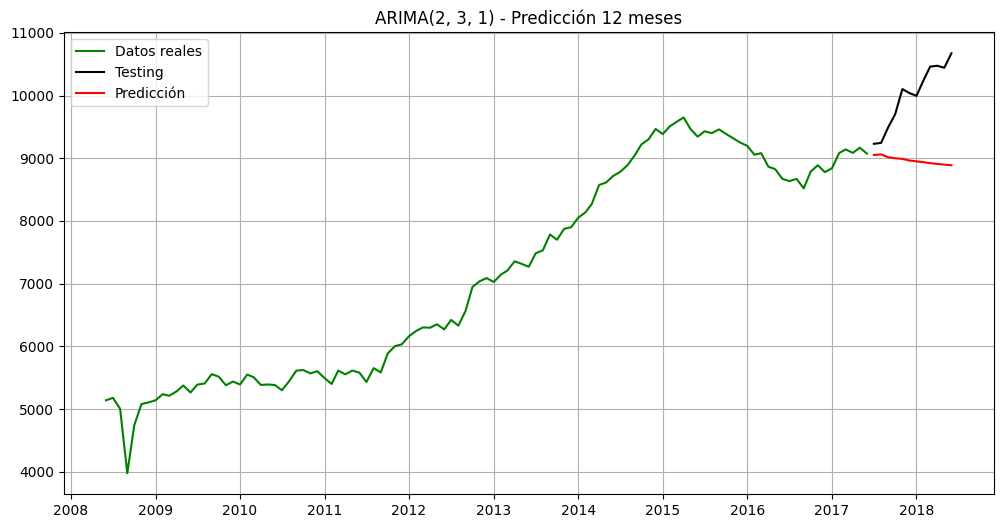

In [100]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(test,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'ARIMA{order} - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [104]:
# Prueba de estacionalidad
adfuller_test = adfuller(df1)

In [ ]:
# Valor de Adfuller
adfuller_test[0]

np.float64(0.2627139289047078)

In [ ]:
# P Value
adfuller_test[1]

# El valor nos dice que nuestra serie no es estacionaria

np.float64(0.9755676444885656)

In [107]:
acf(df1)

array([1.        , 0.97478282, 0.95184018, 0.92754218, 0.89621794,
       0.86983743, 0.84628751, 0.8215604 , 0.79500472, 0.77219387,
       0.74919452, 0.728558  , 0.70739478, 0.6865471 , 0.66476912,
       0.64313811, 0.6219559 , 0.60022384, 0.58044501, 0.56133786,
       0.54060295])

In [108]:
pacf(df1)

array([ 1.        ,  0.98290601,  0.05113546, -0.05283094, -0.23797632,
        0.10791512,  0.11374062, -0.01097244, -0.16462327,  0.07079862,
        0.05078807,  0.1048666 , -0.12760606, -0.03503588, -0.04556189,
        0.06624741, -0.026     , -0.04910963,  0.00801644,  0.06431157,
       -0.08162271])

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

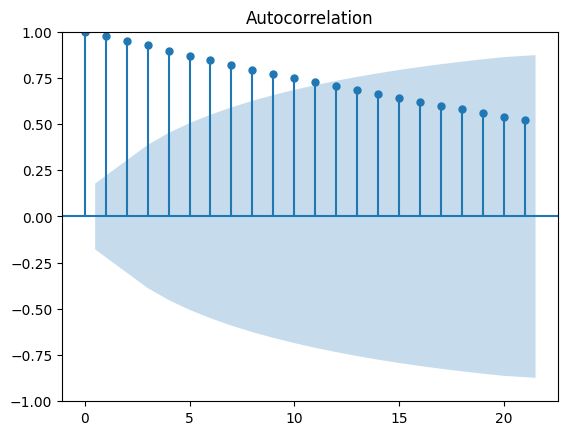

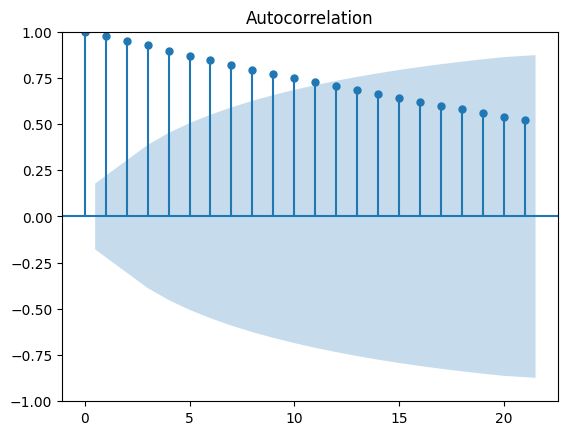

In [110]:
plot_acf(df1)

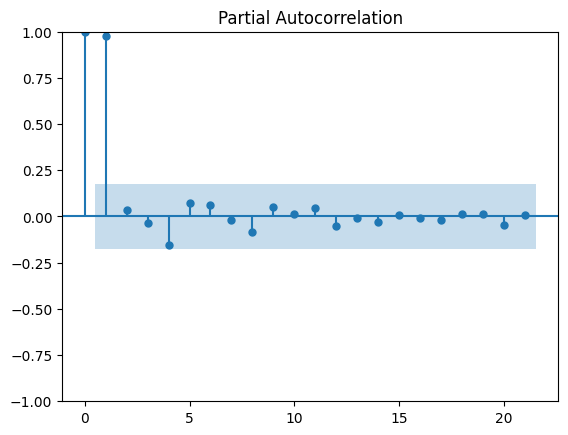

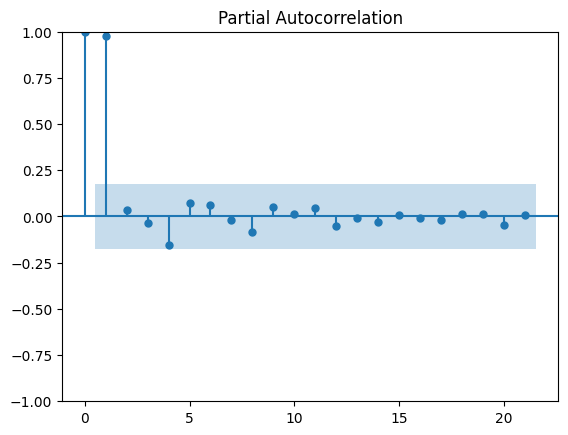

In [111]:
plot_pacf(df1)

In [112]:
train

,Production
Month,
2008-06-01,5138
2008-07-01,5177
2008-08-01,5003
2008-09-01,3974
2008-10-01,4738
...,...
2017-02-01,9083
2017-03-01,9140
2017-04-01,9085


In [118]:
# 0, 1, 4
model = SARIMAX(
    train,
    order=(0,1,4),
    seasonal_order=(0,1,4,horizon)
)

result = model.fit()

/home/codespace/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
result.

{}

In [121]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Production   No. Observations:                  109
Model:             SARIMAX(0, 1, 4)x(0, 1, 4, 12)   Log Likelihood                -638.723
Date:                            Wed, 30 Jul 2025   AIC                           1295.446
Time:                                    22:15:57   BIC                           1318.525
Sample:                                06-01-2008   HQIC                          1304.775
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2504      0.116     -2.161      0.031      -0.478      -0.023
ma.L2         -0.1301      0.111     -1.176      0.240      -0.347       0.087
ma.L3         -0.0713      0.145     -0.493      0.622      -0.355       0.212
ma.L4          0.3703      0.078      4.741      0.000       0.217       0.523
ma.S.L12      -0.9477     15.460     -0.061      0.951     -31.249      29.353
ma.S.L24      -0.2845      0.800     -0.356      0.722      -1.852       1.283
ma.S.L36       0.3520      3.563      0.099      0.921      -6.632       7.336
ma.S.L48      -0.1163      1.913     -0.061      0.952      -3.865       3.633
sigma2      2.693e+04   4.16e+05      0.065      0.948   -7.88e+05    8.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                56.60
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
pred = result.forecast(steps=horizon)

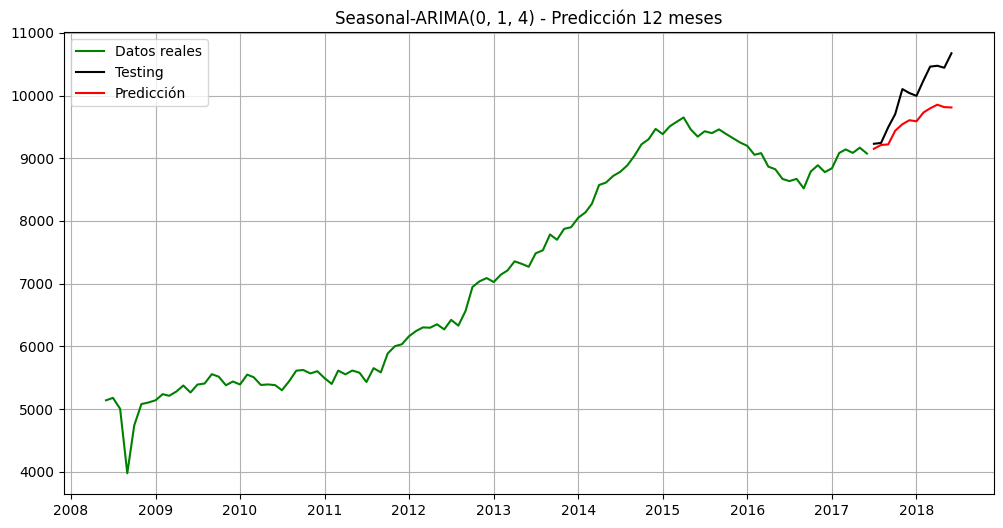

In [124]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(test,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'Seasonal-ARIMA{(0,1,4)} - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()

In [125]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 56.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [126]:
from prophet import Prophet

In [130]:
df2 = df[['Month','Production']]

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       121 non-null    object
 1   Production  121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [132]:
df2['Month'] = pd.to_datetime(df2['Month'])

/tmp/ipykernel_9151/3781488833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.to_datetime(df2['Month'])


In [135]:
df2 = df2.rename(columns= { 'Month' :'ds' , 'Production':'y' })
df2

,ds,y
0,2008-06-01,5138
1,2008-07-01,5177
2,2008-08-01,5003
3,2008-09-01,3974
4,2008-10-01,4738
...,...,...
116,2018-02-01,10248
117,2018-03-01,10461
118,2018-04-01,10475
119,2018-05-01,10443


In [136]:
horizon = 12

train = df2[:-horizon]
test = df2[-horizon:]

In [139]:
test

,ds,y
109,2017-07-01,9230
110,2017-08-01,9244
111,2017-09-01,9495
112,2017-10-01,9703
113,2017-11-01,10103
114,2017-12-01,10040
115,2018-01-01,9995
116,2018-02-01,10248
117,2018-03-01,10461
118,2018-04-01,10475


In [137]:
train

,ds,y
0,2008-06-01,5138
1,2008-07-01,5177
2,2008-08-01,5003
3,2008-09-01,3974
4,2008-10-01,4738
...,...,...
104,2017-02-01,9083
105,2017-03-01,9140
106,2017-04-01,9085
107,2017-05-01,9168


In [138]:
model = Prophet()
model.fit(train)

22:34:29 - cmdstanpy - INFO - Chain [1] start processing
22:34:29 - cmdstanpy - INFO - Chain [1] done processing


In [166]:
future = test
future = future.drop(columns=['y'])
future

,ds
109,2017-07-01
110,2017-08-01
111,2017-09-01
112,2017-10-01
113,2017-11-01
114,2017-12-01
115,2018-01-01
116,2018-02-01
117,2018-03-01
118,2018-04-01


In [141]:
future = model.make_future_dataframe(12,freq='MS')
future

,ds
0,2008-06-01
1,2008-07-01
2,2008-08-01
3,2008-09-01
4,2008-10-01
...,...
116,2018-02-01
117,2018-03-01
118,2018-04-01
119,2018-05-01


In [167]:
result = model.predict(future)

In [168]:
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-01,8759.380534,8487.076517,8948.810837,8758.649886,8759.380534,-40.975468,-40.975468,-40.975468,-40.975468,-40.975468,-40.975468,0.0,0.0,0.0,8718.405066
1,2017-08-01,8735.056623,8436.641864,8892.973950,8729.802028,8740.389977,-69.686133,-69.686133,-69.686133,-69.686133,-69.686133,-69.686133,0.0,0.0,0.0,8665.370491
2,2017-09-01,8710.732713,8311.762553,8780.377428,8697.582072,8723.108107,-167.697184,-167.697184,-167.697184,-167.697184,-167.697184,-167.697184,0.0,0.0,0.0,8543.035528
3,2017-10-01,8687.193444,8471.090430,8931.475267,8664.732894,8709.737270,21.170197,21.170197,21.170197,21.170197,21.170197,21.170197,0.0,0.0,0.0,8708.363641
4,2017-11-01,8662.869533,8505.512449,8951.000160,8626.509066,8697.076932,66.941845,66.941845,66.941845,66.941845,66.941845,66.941845,0.0,0.0,0.0,8729.811378
5,2017-12-01,8639.330265,8439.532988,8916.916797,8591.721872,8685.385818,43.933985,43.933985,43.933985,43.933985,43.933985,43.933985,0.0,0.0,0.0,8683.264250
6,2018-01-01,8615.006354,8371.230958,8857.079653,8555.159984,8673.258658,3.907575,3.907575,3.907575,3.907575,3.907575,3.907575,0.0,0.0,0.0,8618.913928
7,2018-02-01,8590.682443,8386.500573,8897.579538,8514.326360,8663.738554,61.530082,61.530082,61.530082,61.530082,61.530082,61.530082,0.0,0.0,0.0,8652.212525
8,2018-03-01,8568.712459,8423.572574,8905.033934,8476.128979,8657.603144,92.661021,92.661021,92.661021,92.661021,92.661021,92.661021,0.0,0.0,0.0,8661.373480
9,2018-04-01,8544.388548,8363.997483,8893.553564,8437.283164,8652.854691,87.522691,87.522691,87.522691,87.522691,87.522691,87.522691,0.0,0.0,0.0,8631.911240


In [169]:
pred = result[['ds','yhat']]

In [170]:
pred = pred.rename(columns = {'ds':'Month','yhat':'Production'})

In [151]:
pred = pred[-horizon:]

In [171]:
pred = pred.set_index('Month')

In [172]:
pred

,Production
Month,
2017-07-01,8718.405066
2017-08-01,8665.370491
2017-09-01,8543.035528
2017-10-01,8708.363641
2017-11-01,8729.811378
2017-12-01,8683.264250
2018-01-01,8618.913928
2018-02-01,8652.212525
2018-03-01,8661.373480


In [163]:
df2

,ds,y
0,2008-06-01,5138
1,2008-07-01,5177
2,2008-08-01,5003
3,2008-09-01,3974
4,2008-10-01,4738
...,...,...
116,2018-02-01,10248
117,2018-03-01,10461
118,2018-04-01,10475
119,2018-05-01,10443


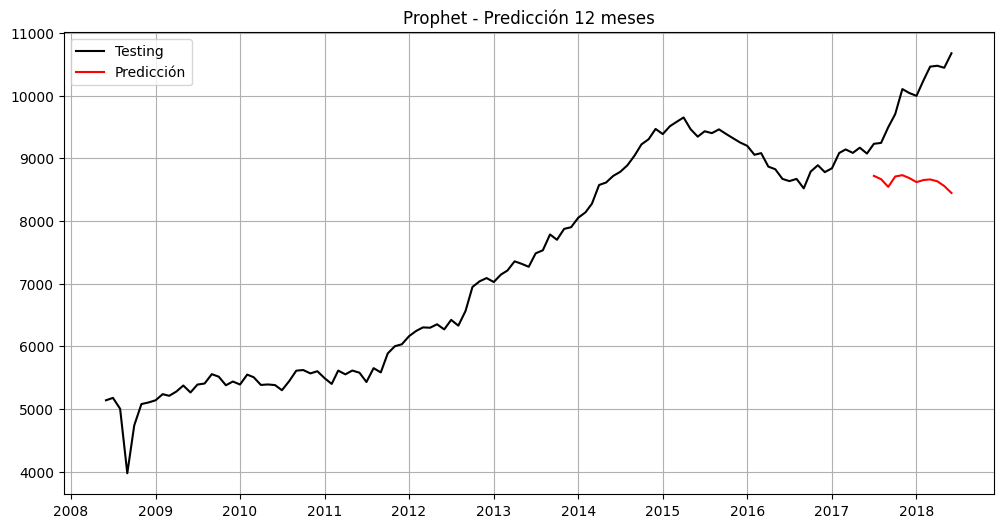

In [173]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
#plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(df2.ds,df2.y,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'Prophet - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()